# Print absolute error values in latex table format 

In [9]:
import pandas as pd 

# Location of the results csv files
results_prefix_str = 'baseline_8-200/s3l_' 
#results_prefix_str = 'results_old/baseline_1layer_MS8-200/s3l_' 
#results_prefix_str = 'XGB/s3l_'
#results_prefix_str = 'baseline_1layer/s3l_'
print(results_prefix_str)
# names of the models
#model_list = ['xgb', 'dae_xgb', 'scarf_xgb', 'vime_xgb' ,'subtab_xgb', 'switchtab_xgb']
#model_list = ['3layer_mlp', '4layer_mlp']
#model_list = ['dae', 'scarf', 'vime']
model_list = ['']
#model_list = ['1layer_mse_mlp', '1layer_l1loss_mlp','1layer_smoothl1loss_mlp','1layer_mape_mlp']

num_samples_list = ['100', '250', '500', '1K', '10K', '20K']

#tasks = ['VR fragment thput.', 'VR burst thput.', 'VR fragment latency', 'VR burst latency', 
#         'UL probe latency', 
#         'DL probe latency'
#        ]
tasks = ['T 1', 'T 2', 'T 3', 'T 4', 'T 5']
task_str = ["\\textbf{T 1} & ", 
                "\\textbf{T 2} & ", 
                "\\textbf{T 3} & ", 
                "\\textbf{T 4} & ", 
                "\\textbf{T 5} & "
               ]
# Read all the results
results = {}
for model in model_list:
    results_ff = pd.read_csv(results_prefix_str+model+'_test_results.csv', delimiter=",", header=None)
    results[model] = {}
    i_start = 0
    for samp in num_samples_list:
        results[model][samp] = results_ff.iloc[i_start:i_start+len(tasks)]
        i_start = i_start + len(tasks)

# for each num of samples 

output_str = ''

for num_samp in num_samples_list:
    output_str = output_str + '\hline' + '\n'
    output_str = output_str + r"\multicolumn{" + str(len(model_list)+1) + r"}{|c|}{\rule{0pt}{2.5ex}Num. of labeled samples = " + num_samp + r"\rule[-1ex]{0pt}{2.5ex}}\\" + '\n'
    output_str = output_str + '\hline' + '\n'
    
    # create 3 err metric dataframnes 
    err_r2 = pd.DataFrame(index=tasks, columns=model_list).astype(float)
    err_mape = pd.DataFrame(index=tasks, columns=model_list).astype(float)
    err_mae = pd.DataFrame(index=tasks, columns=model_list).astype(float) 
    
    for model in model_list:
        # add one column at a time 
        err_mae.loc[:, model] = results[model][num_samp].iloc[:,1]
        err_mape.loc[:, model] = results[model][num_samp].iloc[:,2]
        err_r2.loc[:, model] = results[model][num_samp].iloc[:,3]

    err_r2 = err_r2.round(3)
    err_mae = err_mae.round(3)
    err_mape = err_mape.round(3)

    # CHECK HERE !!!!
    # This is a pandas data frame models are columns, tasks are rows 
    metric_to_print = err_r2
    
    # Convert DataFrame to a LaTeX-friendly format
    latex_table = metric_to_print.apply(lambda row: ' & '.join(row.astype(str)), axis=1)
    latex_table = task_str + latex_table + ' \\\\'
    
    # Join the rows with newline characters
    latex_table_str = '\n'.join(latex_table)
    
    output_str = output_str + latex_table_str + '\n'
    
# Print with & as the delimiter to make it each to import into latex 
print(output_str)

baseline_8-200/s3l_
\hline
\multicolumn{2}{|c|}{\rule{0pt}{2.5ex}Num. of labeled samples = 100\rule[-1ex]{0pt}{2.5ex}}\\
\hline
\textbf{T 1} & 0.366 \\
\textbf{T 2} & -0.122 \\
\textbf{T 3} & 0.024 \\
\textbf{T 4} & 0.263 \\
\textbf{T 5} & -0.048 \\
\hline
\multicolumn{2}{|c|}{\rule{0pt}{2.5ex}Num. of labeled samples = 250\rule[-1ex]{0pt}{2.5ex}}\\
\hline
\textbf{T 1} & 0.479 \\
\textbf{T 2} & 0.502 \\
\textbf{T 3} & 0.727 \\
\textbf{T 4} & 0.721 \\
\textbf{T 5} & 0.583 \\
\hline
\multicolumn{2}{|c|}{\rule{0pt}{2.5ex}Num. of labeled samples = 500\rule[-1ex]{0pt}{2.5ex}}\\
\hline
\textbf{T 1} & 0.535 \\
\textbf{T 2} & 0.509 \\
\textbf{T 3} & 0.761 \\
\textbf{T 4} & 0.764 \\
\textbf{T 5} & 0.326 \\
\hline
\multicolumn{2}{|c|}{\rule{0pt}{2.5ex}Num. of labeled samples = 1K\rule[-1ex]{0pt}{2.5ex}}\\
\hline
\textbf{T 1} & 0.551 \\
\textbf{T 2} & 0.572 \\
\textbf{T 3} & 0.817 \\
\textbf{T 4} & 0.799 \\
\textbf{T 5} & 0.609 \\
\hline
\multicolumn{2}{|c|}{\rule{0pt}{2.5ex}Num. of labeled sample

# Print gains in error values between a baseline and the results in latex table format 

In [13]:
import pandas as pd 

# Location of the results csv files
baseline_prefix_str = 'baseline_8-200/s3l_'
results_prefix_str = 'SP_8-200_pd1/s3l_'

#results_prefix_str = 'XGB/s3l_'
#results_prefix_str = 'baseline_1layer/s3l_'

#model_list = ['xgb', 'dae_xgb', 'scarf_xgb', 'vime_xgb' ,'subtab_xgb', 'switchtab_xgb']
#model_list = ['3layer_mlp', '4layer_mlp']
model_list = ['dae', 'scarf', 'vime']
# This is a hack because for the new way of doing things I do not need a separate baseline for each model 

#model_list = ['1layer_mse_mlp', '1layer_l1loss_mlp','1layer_smoothl1loss_mlp','1layer_mape_mlp']

num_samples_list = ['100', '250', '500', '1K', '10K', '20K']

#tasks = ['VR fragment thput.', 'VR burst thput.', 'VR fragment latency', 'VR burst latency', 
#         'UL probe latency', 
#         'DL probe latency'
#        ]
tasks = ['T 1', 'T 2', 'T 3', 'T 4', 'T 5']
task_str = ["\\textbf{T 1} & ", 
                "\\textbf{T 2} & ", 
                "\\textbf{T 3} & ", 
                "\\textbf{T 4} & ", 
                "\\textbf{T 5} & "
               ]
# Read all the results
results = {}
for model in model_list:
    results_ff = pd.read_csv(results_prefix_str+model+'_test_results.csv', delimiter=",", header=None)
    results[model] = {}
    i_start = 0
    for samp in num_samples_list:
        results[model][samp] = results_ff.iloc[i_start:i_start+len(tasks)]
        i_start = i_start + len(tasks)

# Read all the baselines
baseline = {}
for model in model_list:
    baseline_ff = pd.read_csv(baseline_prefix_str+''+'_test_results.csv', delimiter=",", header=None)
    #baseline_ff = pd.read_csv(baseline_prefix_str+model+'_test_results.csv', delimiter=",", header=None)
    baseline[model] = {}
    i_start = 0
    for samp in num_samples_list:
        baseline[model][samp] = baseline_ff.iloc[i_start:i_start+len(tasks)]
        i_start = i_start + len(tasks)
        
# For each error metric type 
# for each num of samples 

output_str = ''

for num_samp in num_samples_list:
    output_str = output_str + '\hline' + '\n'
    output_str = output_str + r"\multicolumn{" + str(len(model_list)+1) + r"}{|c|}{\rule{0pt}{2.5ex}Num. of labeled samples = " + num_samp + r"\rule[-1ex]{0pt}{2.5ex}}\\" + '\n'
    output_str = output_str + '\hline' + '\n'
    #print('\hline')
    #print(r"\multicolumn{"+str(len(model_list)+1)+r"}{|c|}{\rule{0pt}{2.5ex}Num. of labeled samples = "+num_samp+r"\rule[-1ex]{0pt}{2.5ex}}\\")
    #print('\hline')
    
    # create 3 err metric dataframnes 
    err_r2 = pd.DataFrame(index=tasks, columns=model_list).astype(float)
    err_mape = pd.DataFrame(index=tasks, columns=model_list).astype(float)
    err_mae = pd.DataFrame(index=tasks, columns=model_list).astype(float)
    gains_r2 = pd.DataFrame(index=tasks, columns=model_list).astype(float) 
    
    for model in model_list:
        # add one column at a time 
        err_mae.loc[:, model] = results[model][num_samp].iloc[:,1]
        err_mape.loc[:, model] = results[model][num_samp].iloc[:,2]
        err_r2.loc[:, model] = results[model][num_samp].iloc[:,3]
        gains_r2.loc[:, model] = results[model][num_samp].iloc[:,3] - baseline[model][num_samp].iloc[:,3]

    err_r2 = err_r2.round(3)
    err_mae = err_mae.round(3)
    err_mape = err_mape.round(3)
    gains_r2 = gains_r2.round(3)

    # CHECK HERE !!!!
    # This is a pandas data frame 
    # models are columns, tasks are rows 
    metric_to_print = gains_r2
    
    # Convert DataFrame to a LaTeX-friendly format
    latex_table = metric_to_print.apply(lambda row: ' & '.join(row.astype(str)), axis=1)
    latex_table = task_str + latex_table + ' \\\\'
    
    # Join the rows with newline characters
    latex_table_str = '\n'.join(latex_table)
    
    output_str = output_str + latex_table_str + '\n'
    #print(latex_table_str)
    
# Print with & as the delimiter to make it each to import into latex 
print(output_str)

\hline
\multicolumn{4}{|c|}{\rule{0pt}{2.5ex}Num. of labeled samples = 100\rule[-1ex]{0pt}{2.5ex}}\\
\hline
\textbf{T 1} & -0.085 & -2.538 & 0.015 \\
\textbf{T 2} & 0.542 & 0.354 & 0.515 \\
\textbf{T 3} & 0.697 & 0.267 & 0.607 \\
\textbf{T 4} & 0.483 & 0.152 & 0.363 \\
\textbf{T 5} & 0.444 & 0.128 & 0.334 \\
\hline
\multicolumn{4}{|c|}{\rule{0pt}{2.5ex}Num. of labeled samples = 250\rule[-1ex]{0pt}{2.5ex}}\\
\hline
\textbf{T 1} & 0.038 & -2.173 & -0.047 \\
\textbf{T 2} & 0.053 & -0.155 & -0.02 \\
\textbf{T 3} & 0.061 & -0.17 & 0.029 \\
\textbf{T 4} & 0.093 & -0.081 & 0.011 \\
\textbf{T 5} & -0.102 & -0.357 & -0.242 \\
\hline
\multicolumn{4}{|c|}{\rule{0pt}{2.5ex}Num. of labeled samples = 500\rule[-1ex]{0pt}{2.5ex}}\\
\hline
\textbf{T 1} & 0.077 & -1.285 & -0.065 \\
\textbf{T 2} & 0.117 & -0.034 & 0.039 \\
\textbf{T 3} & 0.06 & -0.042 & 0.014 \\
\textbf{T 4} & 0.07 & -0.03 & 0.0 \\
\textbf{T 5} & 0.233 & 0.07 & 0.089 \\
\hline
\multicolumn{4}{|c|}{\rule{0pt}{2.5ex}Num. of labeled samples

# Plot single bars (not stacked)
## So for a chosen approach

5


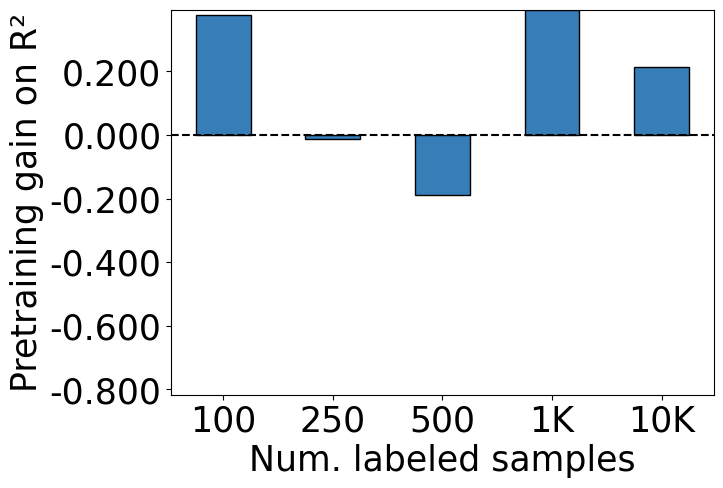

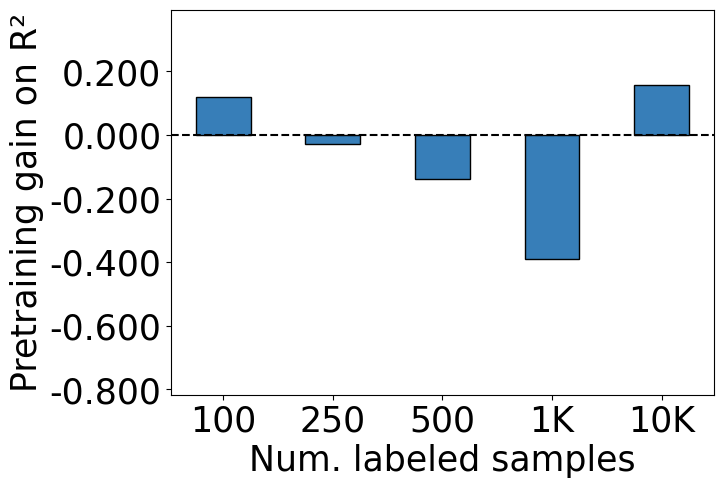

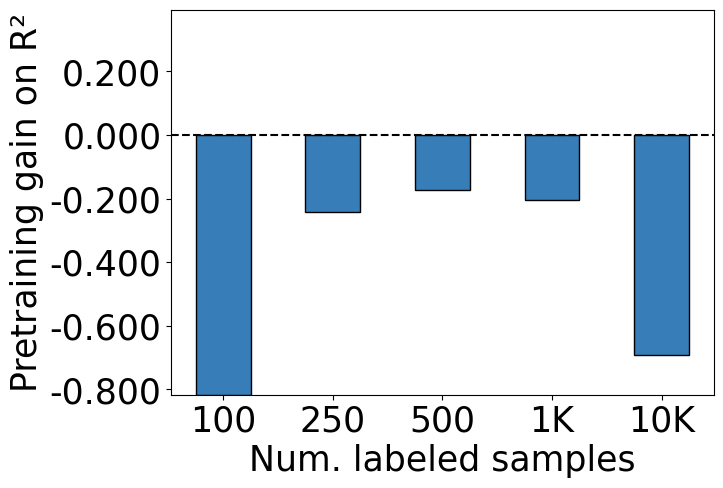

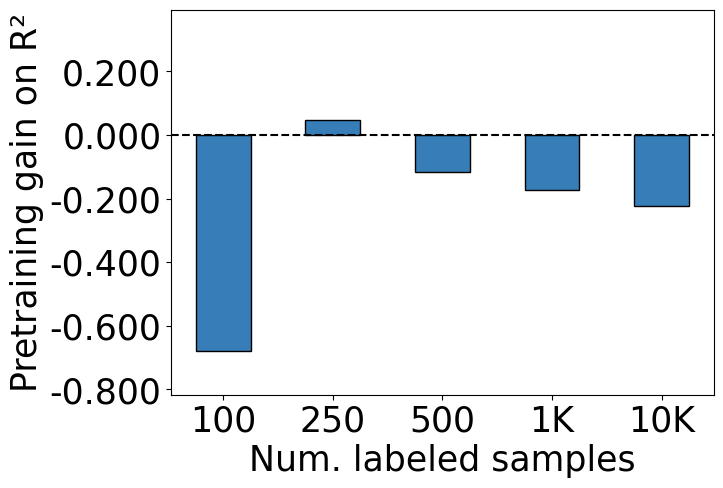

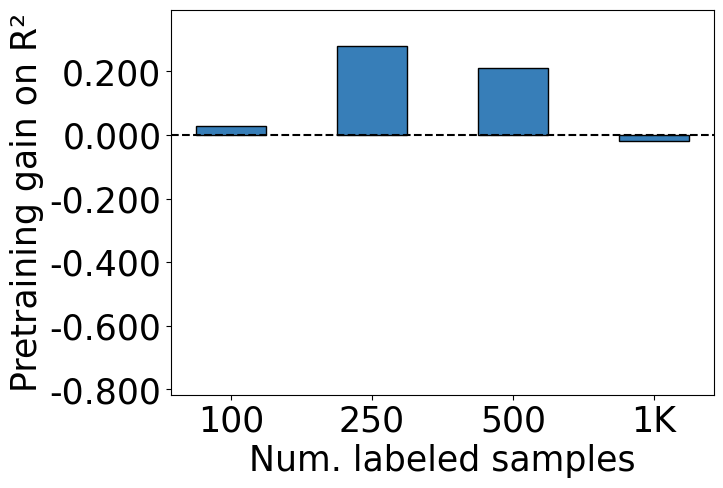

In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

color_palate1 = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2', '#7F7F7F', '#BCBD22', '#17BECF']
color_palate2 = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00'] 

# Location of the results csv files
baseline_prefix_str = 'baseline_1layer_MS4-200/s3l_'
results_prefix_str = 'FP2_SP_1layer_frozen/s3l_'
#plt_str = 'best_baseline_vs_best_pretrainedModel_dae_r2_gainz_PD1_'
plt_str = 'frozen_dae_r2_gainz_PD1_MS4-200_'

model = 'dae'

num_samples_list = ['100', '250', '500', '1K', '10K', '20K']
tasks = ['T 1', 'T 2', 'T 3', 'T 4', 'T 5']
print(len(tasks))

# Read all the results
results = {}
results_ff = pd.read_csv(results_prefix_str+model+'_test_results.csv', delimiter=",", header=None)
i_start = 0
for samp in num_samples_list:
    results[samp] = results_ff.iloc[i_start:i_start+len(tasks)]
    i_start = i_start + len(tasks)

# Read all the baselines
baseline = {}
baseline_ff = pd.read_csv(baseline_prefix_str+model+'_test_results.csv', delimiter=",", header=None)
i_start = 0
for samp in num_samples_list:
    baseline[samp] = baseline_ff.iloc[i_start:i_start+len(tasks)]
    i_start = i_start + len(tasks)
        
gainz_plot_array = np.zeros((len(tasks), len(num_samples_list)))

for n, num_samp in enumerate(num_samples_list):
    
    # create 3 err metric dataframnes 
    err_r2 = arr = np.zeros(len(tasks))
    err_mape = np.zeros(len(tasks))
    err_mae = np.zeros(len(tasks))
    gains_r2 = np.zeros(len(tasks))
    
    err_mae = results[num_samp].iloc[:,1]
    err_mape = results[num_samp].iloc[:,2]
    err_r2 = results[num_samp].iloc[:,3]
    gains_r2 = results[num_samp].iloc[:,3] - baseline[num_samp].iloc[:,3]

    # save this into the finaly plotting array 
    gainz_plot_array[:,n] = gains_r2
    

font_size=25
y_lim = [min(min(row) for row in gainz_plot_array), max(max(row) for row in gainz_plot_array)]
for t, task in enumerate(tasks):
    # Fix the number of decimals in the y-tick labels (2 decimal places in this case)
    plt.figure(figsize=(7, 5))
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    plt.bar(num_samples_list, gainz_plot_array[t,:], width=0.5, color=color_palate2[0], edgecolor='black')
    #plt.ylim(bottom=0)
    plt.xlabel('Num. labeled samples', fontsize=font_size)
    plt.ylabel('Pretraining gain on R²', fontsize=font_size)
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.ylim(y_lim)
    plt.axhline(y=0, color='black', linestyle='--')
    #plt.legend(fontsize=font_size)
    plt.savefig('plots/'+plt_str+task+'.pdf', bbox_inches='tight')
    plt.show()

# Plot stacked bars
## Compare model sizes 
## Compare pretraining datasets
## Use either absolute error or gains

baseline_8-200/s3l_ SP_4-200_pd1/s3l_
baseline_8-200/s3l_ SP_4-200_pd2/s3l_
baseline_8-200/s3l_ SP_4-200_pd3/s3l_
baseline_8-200/s3l_ SP_4-200_pd4/s3l_


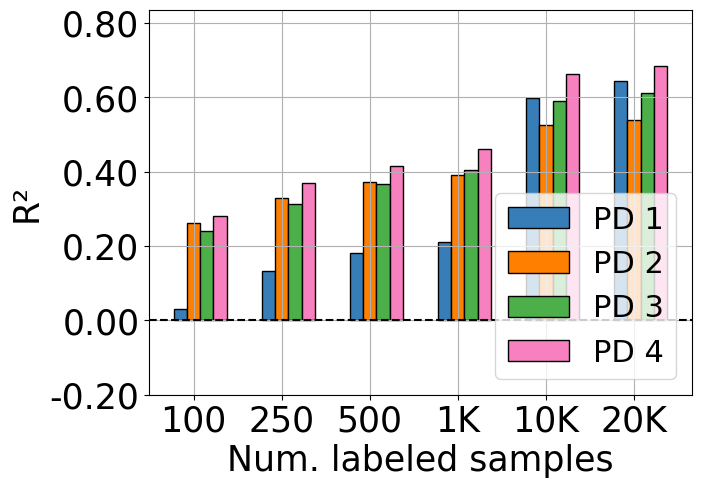

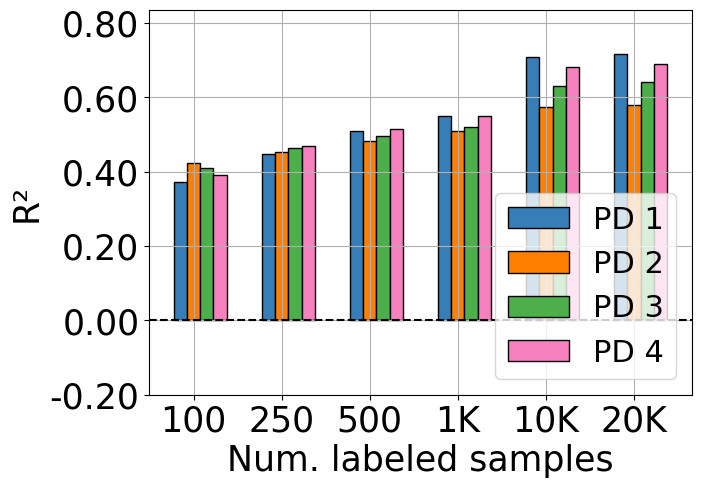

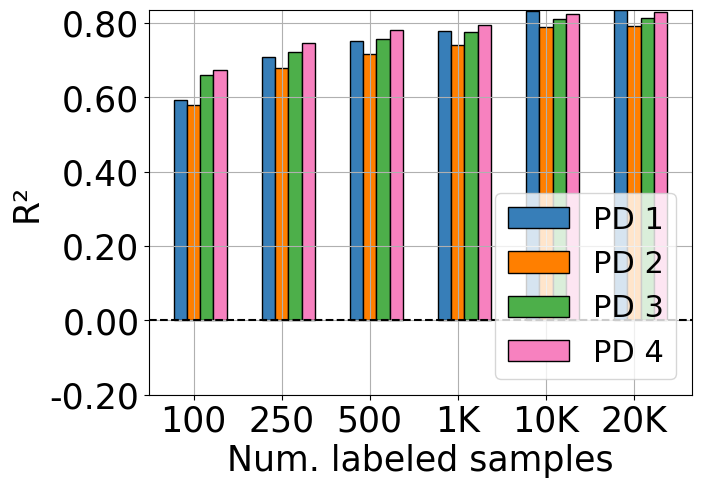

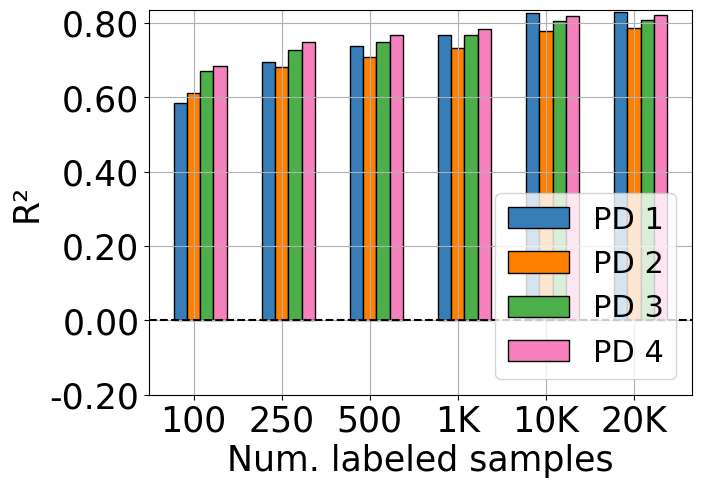

In [ ]:
gains = False # do you want gains or raw values of R2  

#baseline_prefix_str_arr = ['baseline_2-200/s3l_', 'baseline_4-200/s3l_', 'baseline_8-200/s3l_']
baseline_prefix_str_arr = ['baseline_8-200/s3l_']*4
#baseline_prefix_str_arr = ['baseline_8-200/s3l_']

#results_prefix_str_arr = ['SP_2-200_pd4/s3l_', 'SP_4-200_pd4/s3l_', 'SP_8-200_pd4/s3l_']
#results_prefix_str_arr = ['SP_2-200_pd1/s3l_', 'SP_4-200_pd1/s3l_', 'SP_8-200_pd1/s3l_']
results_prefix_str_arr = ['SP_4-200_pd1/s3l_', 'SP_4-200_pd2/s3l_', 'SP_4-200_pd3/s3l_', 'SP_4-200_pd4/s3l_']
#results_prefix_str_arr = ['SP_2-200_pd1/s3l_']
#results_prefix_str_arr = ['baseline_2-200/s3l_', 'baseline_4-200/s3l_', 'baseline_8-200/s3l_']

equalize_y = True

model = 'vime' # 'dae'
baseline_model = 'dae' # or ''
legend_str_arr = ['PD 1', 'PD 2', 'PD 3', 'PD 4'] 
#legend_str_arr = ['MS 2-200', 'MS 4-200', 'MS 8-200']

#plt_str = model+'_gains(old)_r2_8-200_baseline_8-200_varyPretrainingDataset_'
#plt_str = model+'_gains(old)_r2_2-200_varyPretrainingDataset_'
#plt_str = model+'_gains(old)_r2_pd1_8-200_baseline_varyModelSize_'
#plt_str = model+'_gains_r2_pd1_varyModelSize_'
#plt_str = model+'_gains_r2_4-200_varyPretrainingDataset_'
#plt_str = model+'_gains(old)_r2_pd4_varyModelSize_'

#plt_str = model+'_r2_pd4_varyModelSize_'
#plt_str = model+'_r2_pd1_varyModelSize_'
plt_str = model+'_r2_4-200_varyPretrainingDataset_'
#plt_str = model+'_r2_2-200_pd1_'

#plt_str = model+'_baseline_r2_varyModelSize_'
#plt_str = 'baseline_r2_varyModelSize_'

# use this for vary pretraining dataset
#color_palate = ['#17BECF','#BCBD22','#7F7F7F', '#E377C2', '#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B']
# Use this for vary model size 
color_palate = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00'] 

#================================================================================================

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

plot_struct = {}

# Location of the results csv files
for baseline_prefix_str, results_prefix_str in zip(baseline_prefix_str_arr, results_prefix_str_arr):
    print(baseline_prefix_str, results_prefix_str)
    
    num_samples_list = ['100', '250', '500', '1K', '10K', '20K']
    tasks = ['T 1', 'T 2', 'T 3', 'T 4', 'T 5']
    
    # Read all the results
    results = {}
    results_ff = pd.read_csv(results_prefix_str+model+'_test_results.csv', delimiter=",", header=None)
    i_start = 0
    for samp in num_samples_list:
        results[samp] = results_ff.iloc[i_start:i_start+len(tasks)]
        i_start = i_start + len(tasks)
    
    # Read all the baselines
    baseline = {}
    #baseline_ff = pd.read_csv(baseline_prefix_str+'_test_results.csv', delimiter=",", header=None)
    baseline_ff = pd.read_csv(baseline_prefix_str+baseline_model+'_test_results.csv', delimiter=",", header=None)
    i_start = 0
    for samp in num_samples_list:
        baseline[samp] = baseline_ff.iloc[i_start:i_start+len(tasks)]
        i_start = i_start + len(tasks)
            
    plot_array = np.zeros((len(tasks), len(num_samples_list)))
        
    for n, num_samp in enumerate(num_samples_list):
        
        # create 3 err metric dataframnes 
        err_r2 = arr = np.zeros(len(tasks))
        err_mape = np.zeros(len(tasks))
        err_mae = np.zeros(len(tasks))
        gains_r2 = np.zeros(len(tasks))
        
        err_mae = results[num_samp].iloc[:,1]
        err_mape = results[num_samp].iloc[:,2]
        err_r2 = results[num_samp].iloc[:,3]
        gains_r2 = results[num_samp].iloc[:,3] - baseline[num_samp].iloc[:,3]
    
        # save this into the finaly plotting array 
        if gains :
            plot_array[:,n] = gains_r2
        else:
            plot_array[:,n] = err_r2

    plot_struct[results_prefix_str] = plot_array

font_size=25
y_max = max(max(max(row) for row in two_d_list) for two_d_list in plot_struct.values())
y_min = min([0, min(min(min(row) for row in two_d_list) for two_d_list in plot_struct.values())])
#print(y_min, y_max)

for t, task in enumerate(tasks):
    # Fix the number of decimals in the y-tick labels (2 decimal places in this case)
    plt.figure(figsize=(7, 5))
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ind = np.arange(len(num_samples_list))  
    width = 0.15

    task_y_min = 1000000000
    for i, results_prefix_str in enumerate(results_prefix_str_arr):
        data = plot_struct[results_prefix_str][t,:]
        plt.bar(ind+width*i, data, width, color = color_palate[i], edgecolor='black')
        task_y_min = min(min(data), task_y_min)
        
    plt.xticks(ind+width, num_samples_list, fontsize=font_size) 
    plt.legend(legend_str_arr, fontsize=22, loc='lower right') 
    plt.xlabel('Num. labeled samples', fontsize=font_size)
    if gains:
        plt.ylabel('Pretraining gain on R²', fontsize=font_size)
    else:
        plt.ylabel('R²', fontsize=font_size)
    plt.yticks(fontsize=font_size)
    if equalize_y:    
        #plt.ylim([max(-0.30,y_min), y_max])
        plt.ylim([-0.20, y_max])
    else:
        plt.ylim(bottom=-0.20)
        
    plt.axhline(y=0, color='black', linestyle='--')
    #if task_y_min >= 0:
    #    plt.ylim(bottom=0)
    #else:
    #    plt.ylim(bottom=max(-0.30,task_y_min))
    plt.grid()
    plt.savefig('plots/'+plt_str+task+'.pdf', bbox_inches='tight')
    plt.show()

        # Find the minimum y for this specirfic task

# Compare approaches 

5
5
5
-1.254 0.107


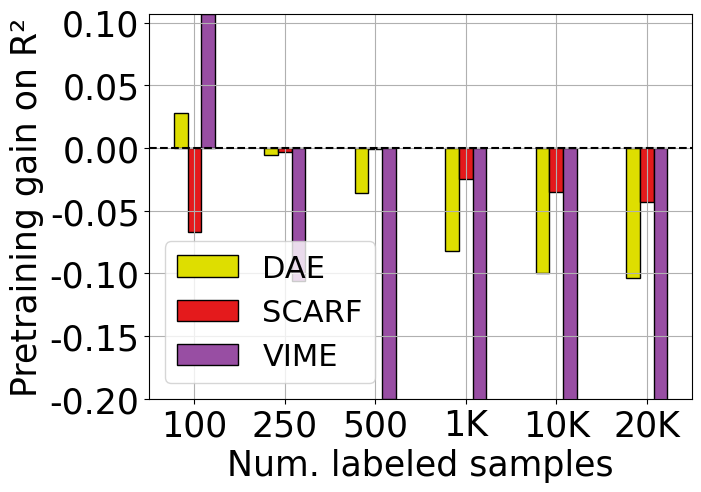

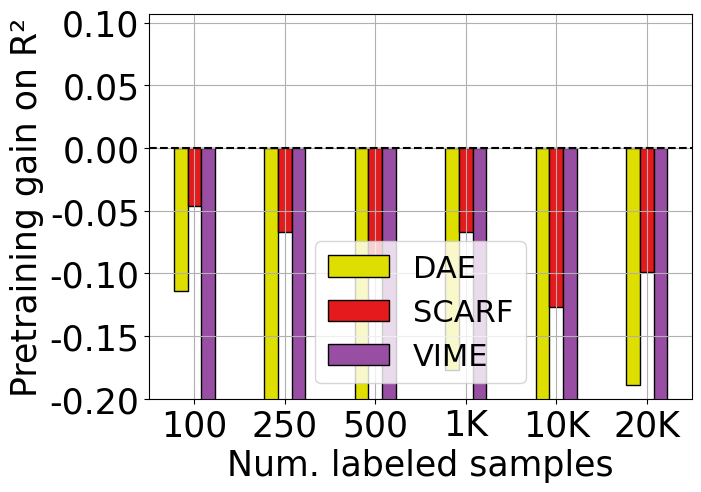

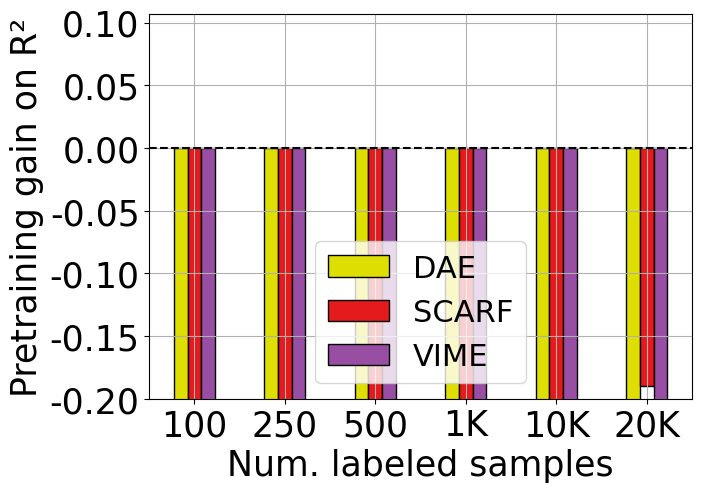

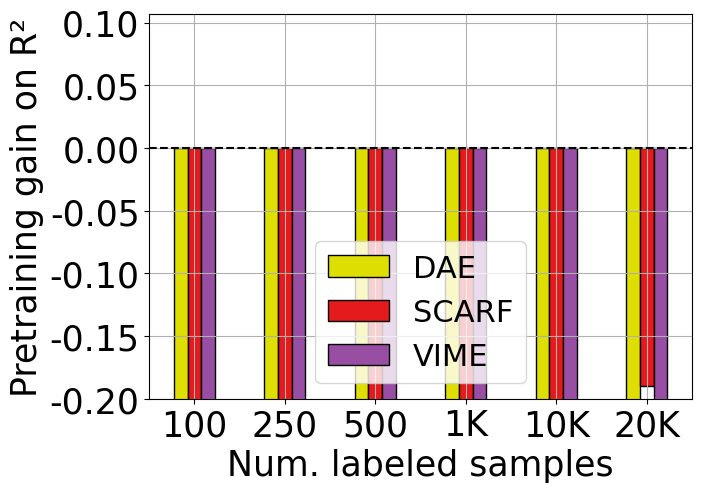

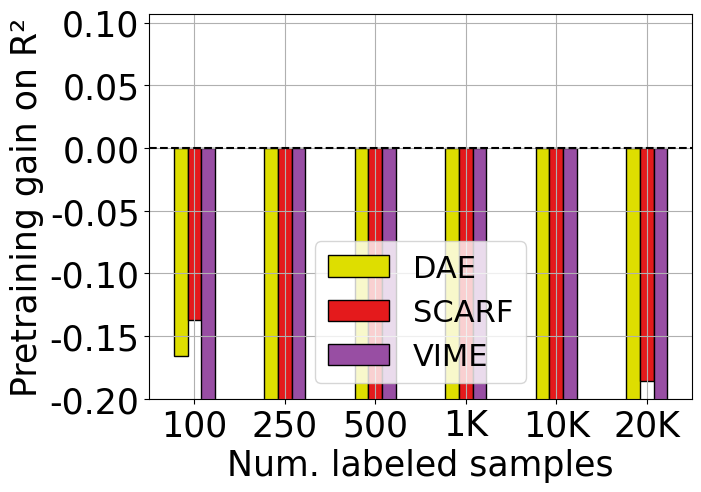

In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

color_palate = ['#dede00', '#e41a1c', '#984ea3', '#999999'] 

gains = True

#baseline_model = ['baseline_8-200/s3l_', 'baseline_2-200/s3l_', 'baseline_8-200/s3l_']
baseline_model = ['baseline_8-200/s3l_']*3

#results_model = ['SP_8-200_pd1/s3l_', 'SP_2-200_pd1/s3l_', 'SP_8-200_pd4/s3l_']
#results_model = ['SP_8-200_pd1/s3l_', 'SP_2-200_pd1/s3l_', 'SP_8-200_pd4/s3l_', 'XGB/s3l_', ]
results_model = ['SP_frozen_pd1-8-200_pd1-2-200_pd4-8-200/s3l_', 
                 'SP_frozen_pd1-8-200_pd1-2-200_pd4-8-200/s3l_', 
                 'SP_frozen_pd1-8-200_pd1-2-200_pd4-8-200/s3l_']
#bs_model = 'dae'
bs_model = 'dae'

#legend = ['DAE (PD 1, MS 8-200)', 'SCARF (PD 1, MS 2-200)', 'VIME (PD 4, MS 8-200)', 'XGB']
#legend = ['DAE', 'SCARF', 'VIME', 'XGB']
legend = ['DAE', 'SCARF', 'VIME']

#plt_str = 'test'
plt_str = 'gains_r2_8-200_baseline_pd1-8-200_pd1-2-200_pd4-8-200_frozen_varyApproach'
#plt_str = 'gains_r2_8-200_baseline_pd1-8-200_pd1-2-200_pd4-8-200_xgb_varyApproach'
#plt_str = 'r2_pd1-8-200_pd1-2-200_pd4-8-200_xgb_varyApproach'



plot_struct = {}

#models = ['dae', 'scarf', 'vime', 'xgb']
models = ['dae', 'scarf', 'vime']
equalize_y = True

for mi, model in enumerate(models):
    
    num_samples_list = ['100', '250', '500', '1K', '10K', '20K']
    tasks = ['T 1', 'T 2', 'T 3', 'T 4', 'T 5']
    print(len(tasks))
    
    # Read all the results
    results = {} #key is num of samples
    results_ff = pd.read_csv(results_model[mi]+model+'_test_results.csv', delimiter=",", header=None)
    i_start = 0
    for samp in num_samples_list:
        results[samp] = results_ff.iloc[i_start:i_start+len(tasks)]
        i_start = i_start + len(tasks)

    if gains:
        # Read all the baselines
        baseline = {}
        baseline_ff = pd.read_csv(baseline_model[mi]+bs_model+'_test_results.csv', delimiter=",", header=None)
        #baseline_ff = pd.read_csv(baseline_model[mi]+'_test_results.csv', delimiter=",", header=None)
        i_start = 0
        for samp in num_samples_list:
            baseline[samp] = baseline_ff.iloc[i_start:i_start+len(tasks)]
            i_start = i_start + len(tasks)
            
    plot_array = np.zeros((len(tasks), len(num_samples_list)))
    for n, num_samp in enumerate(num_samples_list):
        
        # create 3 err metric dataframnes 
        err_r2 = arr = np.zeros(len(tasks))
        err_mape = np.zeros(len(tasks))
        err_mae = np.zeros(len(tasks))
        gains_r2 = np.zeros(len(tasks))
        
        err_mae = results[num_samp].iloc[:,1]
        err_mape = results[num_samp].iloc[:,2]
        err_r2 = results[num_samp].iloc[:,3]
        if gains:
            gains_r2 = results[num_samp].iloc[:,3] - baseline[num_samp].iloc[:,3]
            plot_array[:,n] = gains_r2
        else:
            plot_array[:,n] = err_r2

    plot_struct[model] = plot_array





font_size=25
if equalize_y:
    y_max = max(max(max(row) for row in two_d_list) for two_d_list in plot_struct.values())
    y_min = min([0, min(min(min(row) for row in two_d_list) for two_d_list in plot_struct.values())])
    print(y_min, y_max)

for t, task in enumerate(tasks):
    # Fix the number of decimals in the y-tick labels (2 decimal places in this case)
    plt.figure(figsize=(7, 5))
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ind = np.arange(len(num_samples_list))  
    width = 0.15
    
    for i, model in enumerate(models):
        data = plot_struct[model][t,:]
        plt.bar(ind+width*i, data, width, color = color_palate[i], edgecolor='black') 
        
    plt.xticks(ind+width, num_samples_list, fontsize=font_size) 
    plt.legend(legend, fontsize=22, loc='best') 
    #plt.ylim(bottom=0)
    plt.xlabel('Num. labeled samples', fontsize=font_size)
    if gains:
        plt.ylabel('Pretraining gain on R²', fontsize=font_size)
    else:
        plt.ylabel('R²', fontsize=font_size)
    #plt.ylabel('R²', fontsize=font_size)
    plt.yticks(fontsize=font_size)
    if equalize_y:
        plt.ylim([-0.20, y_max])
        #plt.ylim([y_min, y_max])
    plt.axhline(y=0, color='black', linestyle='--')
    plt.grid()
    plt.savefig('plots/'+plt_str+task+'.pdf', bbox_inches='tight')
    plt.show()

    